In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
sns.get_dataset_names()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\andre\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [41]:
a = sns.load_dataset('tips')
print(a.shape)
a.head()


(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
cars = sns.load_dataset('car_crashes')

In [4]:
cars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


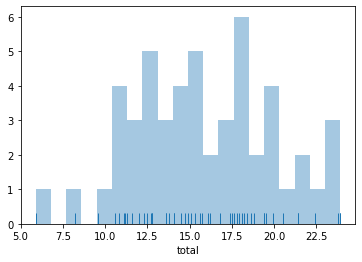

In [5]:
sns.distplot(cars['total'], bins= 20 ,hist = True, kde = False, rug = True)

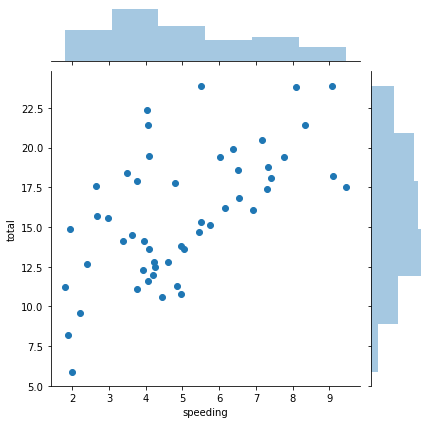

In [6]:
sns.jointplot(x = cars['speeding'], y = cars['total'])

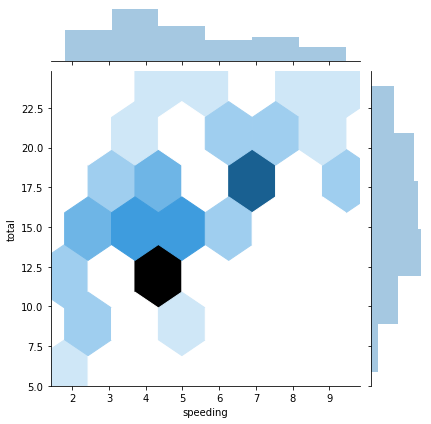

In [7]:
sns.jointplot('speeding', 'total', cars, kind= "hex")

In [8]:
pen = sns.load_dataset('penguins')

In [9]:
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
pen['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


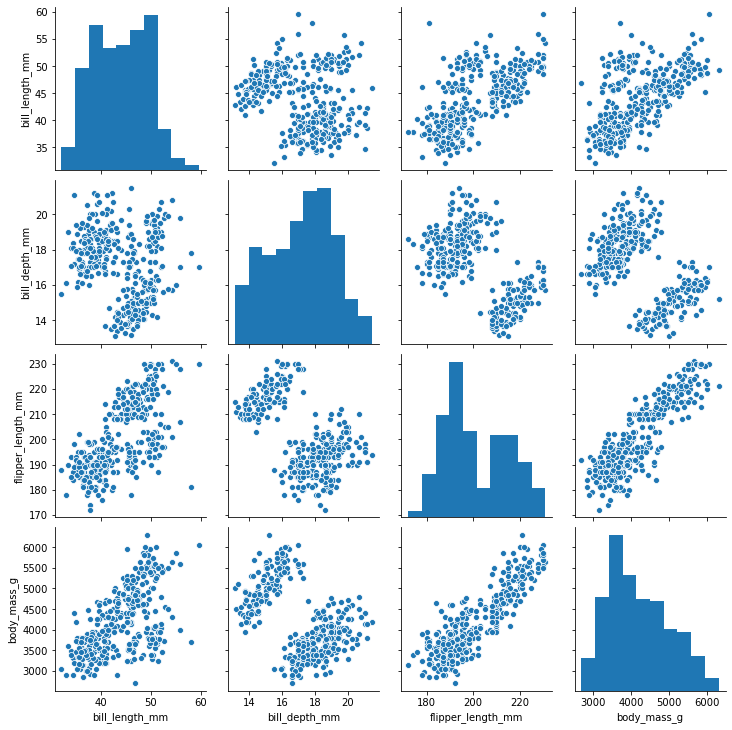

In [12]:
# sns.set(font_scale=1.5)
sns.pairplot(pen)

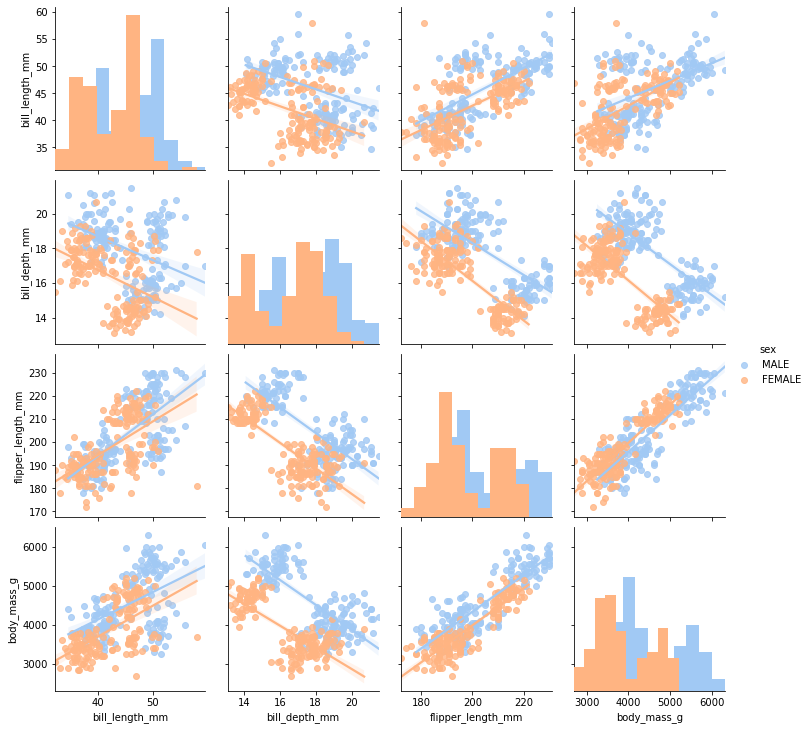

In [13]:
sns.pairplot(pen, hue = 'sex', diag_kind='hist', kind = 'reg', palette = 'pastel')

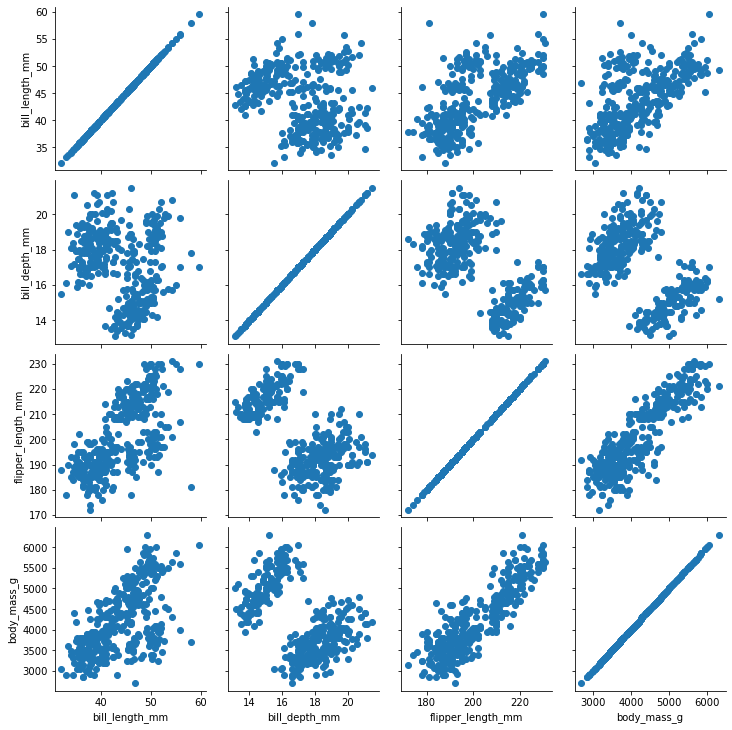

In [14]:
g  = sns.PairGrid(pen)
g.map(plt.scatter)

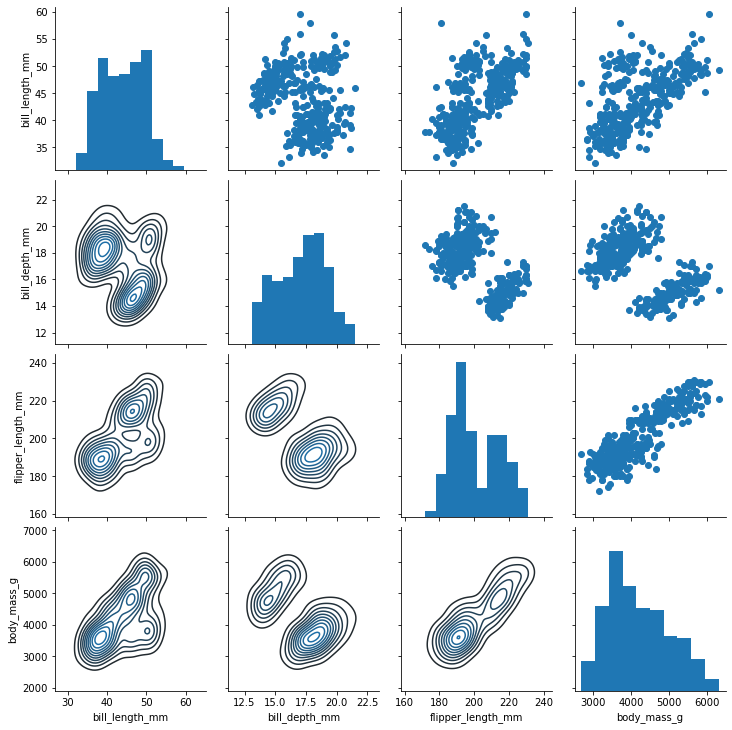

In [15]:
g  = sns.PairGrid(pen)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

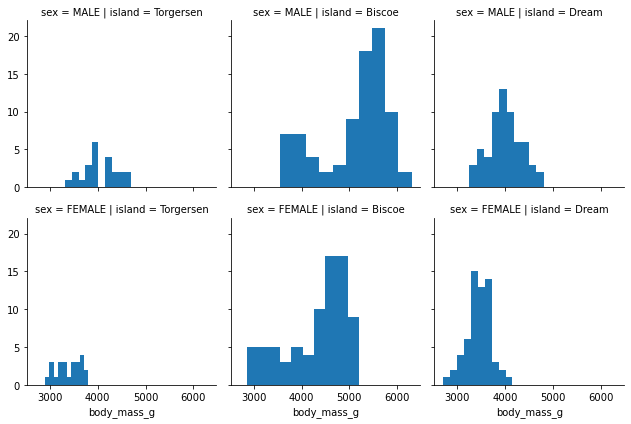

In [16]:
g = sns.FacetGrid(pen,'sex' ,'island' )
g.map(plt.hist, 'body_mass_g')

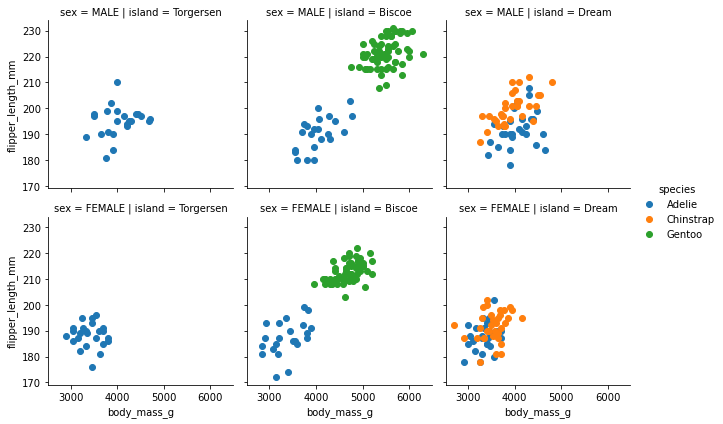

In [17]:
g = sns.FacetGrid(pen,'sex' ,'island', hue = 'species' )
g.map(plt.scatter, 'body_mass_g', 'flipper_length_mm').add_legend()

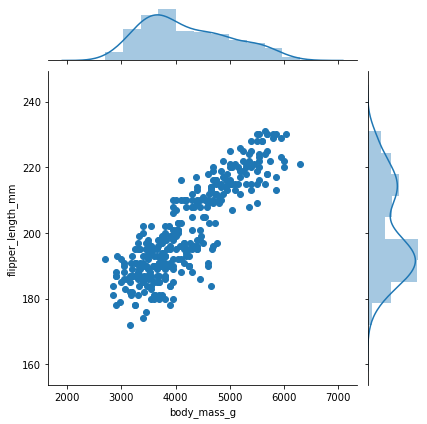

In [18]:
g = sns.JointGrid('body_mass_g' ,'flipper_length_mm', pen)
g.plot(plt.scatter, sns.distplot)
# g.plot(sns.regplot, sns.distplot)

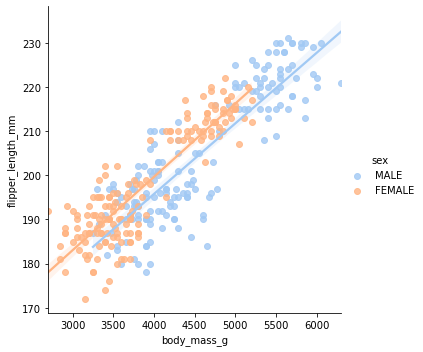

In [19]:
sns.lmplot('body_mass_g' ,'flipper_length_mm', pen, hue = 'sex', palette = 'pastel')

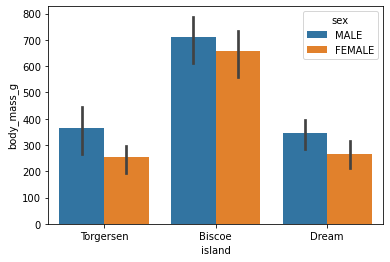

In [20]:
sns.barplot(x = 'island', y = 'body_mass_g', data = pen, hue = 'sex', estimator = np.std)

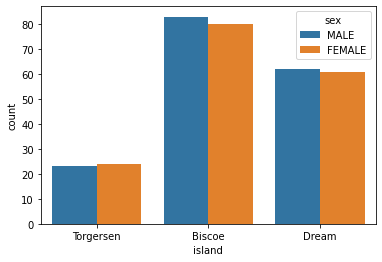

In [21]:
sns.countplot(x = 'island', data = pen, hue='sex')

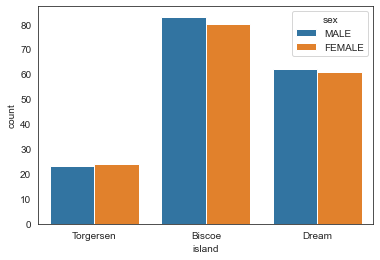

In [22]:
sns.set_style('white')
# sns.set_style("whitegrid")
# sns.set_style("dark")
# sns.set_style('ticks')
sns.countplot(x = 'island', data = pen, hue='sex')

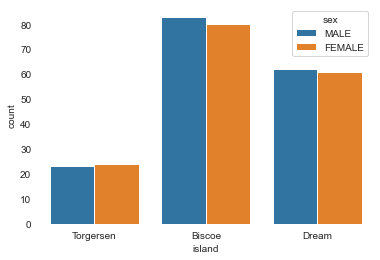

In [23]:
sns.countplot(x = 'island', data = pen, hue='sex')
sns.despine(left = True, bottom=True)

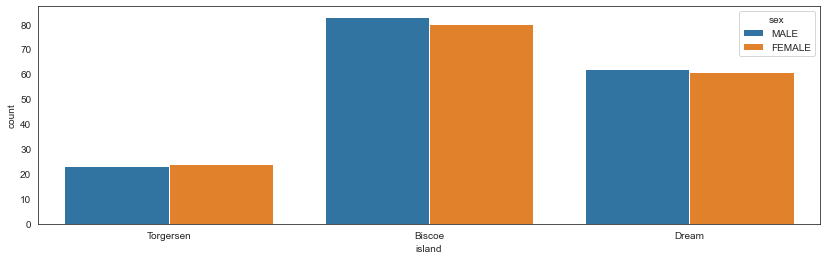

In [24]:
plt.figure(figsize=(14,4))
sns.countplot(x = 'island', data = pen, hue='sex')

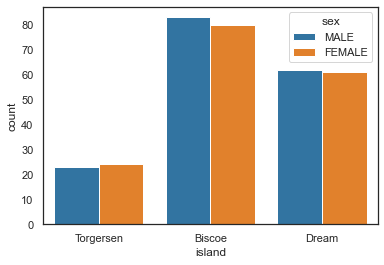

In [25]:
# sns.set_context('paper')
sns.set_context('notebook', font_scale=1)
# sns.set_context('talk')
# sns.set_context('poster')

sns.countplot(x = 'island', data = pen, hue='sex')

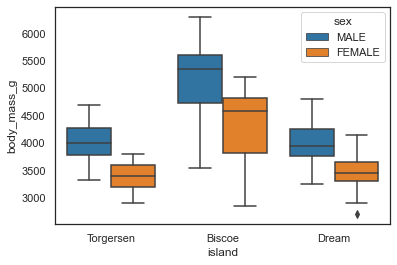

In [26]:
sns.boxplot(x = 'island', y = 'body_mass_g', data = pen, hue = 'sex')

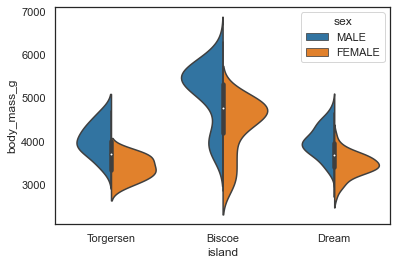

In [27]:
sns.violinplot(x = 'island', y = 'body_mass_g', data = pen, hue = 'sex', split = True)

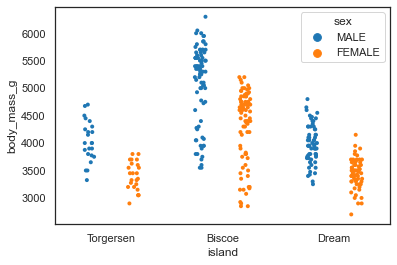

In [28]:
sns.stripplot(x = 'island', y = 'body_mass_g', data = pen, size = 4, jitter = True, hue = 'sex', dodge = True)

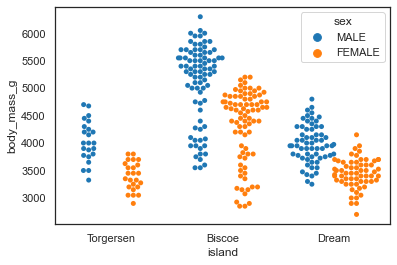

In [29]:
sns.swarmplot(x = 'island', y = 'body_mass_g', data = pen, hue = 'sex', dodge = True)

C:\Users\andre\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\andre\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


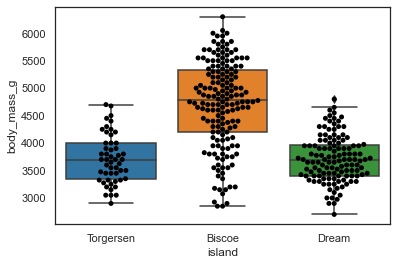

In [30]:
sns.boxplot(x = 'island', y = 'body_mass_g', data = pen)
sns.swarmplot(x = 'island', y = 'body_mass_g', data = pen, color = 'black')

In [31]:
pen.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


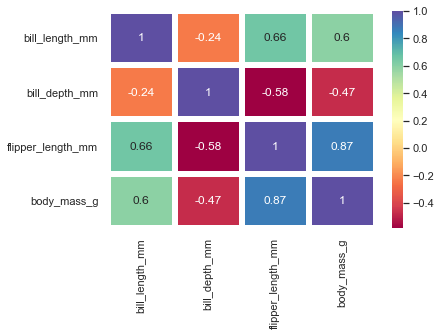

In [32]:
sns.heatmap(data = pen.corr(), annot=True, cmap = "Spectral", linecolor='white', linewidths=5)

In [33]:
sd = pd.DataFrame()
for i in os.listdir('C:\\Users\\andre\\Desktop\\Curso_Ciencia_de_Datos\\semana7//data//Sales_Data'):
    sd = sd.append(pd.read_csv('C:\\Users\\andre\\Desktop\\Curso_Ciencia_de_Datos\\semana7//data//Sales_Data//' + i))
sd = sd.dropna(subset = ['Order Date'])
sd = sd[['Product', 'Quantity Ordered', 'Order Date']]
sd = sd.sort_values('Order Date', ascending=False)
sd = sd.iloc[355:,:]
sd['mes']=sd['Order Date'].str[:2]
sd = sd.drop('Order Date', axis = 1)
sd['Quantity Ordered'] = sd['Quantity Ordered'].astype(int)
sd = sd.pivot_table(values='Quantity Ordered', index = 'Product', columns= 'mes' , aggfunc=sum)
sd.head()

mes,01,02,03,04,05,06,07,08,09,10,11,12
Product,,,,,,,,,,,,
20in Monitor,218,246,326,393,341,322,327,261,277,429,420,569
27in 4K Gaming Monitor,313,427,479,566,542,451,483,440,381,723,575,864
27in FHD Monitor,422,475,608,736,689,567,607,491,483,791,719,962
34in Ultrawide Monitor,314,418,522,654,544,455,462,380,379,671,551,849
AA Batteries (4-pack),1424,1735,2216,2821,2384,2096,2071,1828,1771,2940,2625,3724


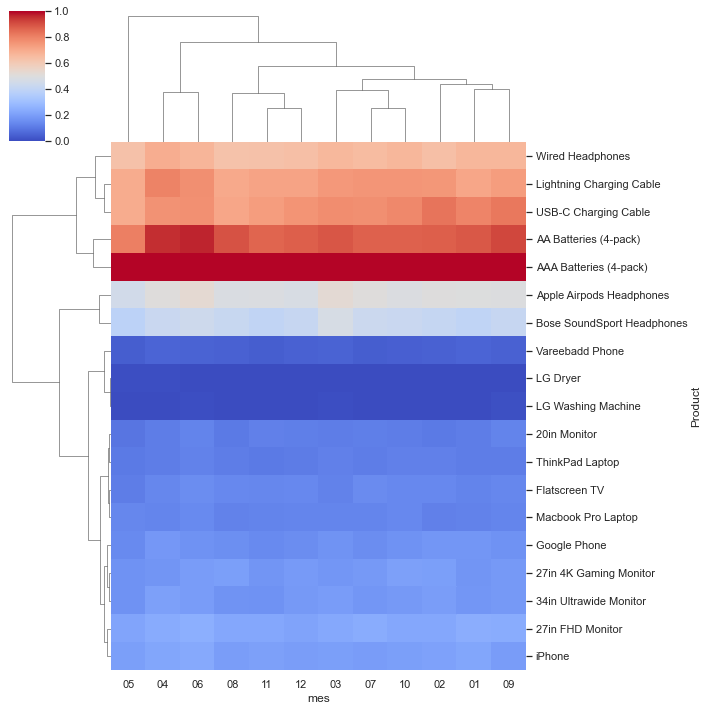

In [34]:
sns.clustermap(sd, cmap='coolwarm', standard_scale=1)